# KBO 타자 OPS 예측 경진대회
- url: https://www.dacon.io/competitions/official/62540/talkboard

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# 1. 데이터 분석(EDA)

In [2]:
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' #window
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False #한글 사용할 때 마이너스 기호 깨지는것을 해결

## 데이터 로드

In [3]:
#프리시즌 데이터
preseason_df = pd.read_csv('Pre_Season_Batter.csv')

#정규시즌 데이터
regular_season_df = pd.read_csv('Regular_Season_Batter.csv')

print('프리시즌 데이터 크기: ', preseason_df.shape)
print('정규시즌 데이터 크기: ', regular_season_df.shape)

프리시즌 데이터 크기:  (1393, 29)
정규시즌 데이터 크기:  (2454, 29)


## 1-1. 프리시즌 데이터 분석

In [4]:
print(preseason_df.head())

   batter_id batter_name  year team    avg   G  AB  R  H  2B  ...  GDP    SLG  \
0          0        가르시아  2018   LG  0.350   7  20  1  7   1  ...    1  0.550   
1          1         강경학  2011   한화  0.000   4   2  2  0   0  ...    0  0.000   
2          1         강경학  2014   한화      -   4   0  2  0   0  ...    0    NaN   
3          1         강경학  2015   한화  0.130  10  23  3  3   0  ...    0  0.130   
4          1         강경학  2016   한화  0.188  14  32  4  6   1  ...    0  0.281   

     OBP  E  height/weight      year_born   position  \
0  0.409  1     177cm/93kg  1985년 04월 12일  내야수(우투우타)   
1  0.500  0     180cm/72kg  1992년 08월 11일  내야수(우투좌타)   
2    NaN  0     180cm/72kg  1992년 08월 11일  내야수(우투좌타)   
3  0.286  2     180cm/72kg  1992년 08월 11일  내야수(우투좌타)   
4  0.212  0     180cm/72kg  1992년 08월 11일  내야수(우투좌타)   

                                   career  starting_salary    OPS  
0  쿠바 Ciego de Avila Maximo Gomez Baez(대)              NaN  0.959  
1                       광주대성초-광주동성중-광주동성

In [5]:
display(preseason_df.head()) #display!?

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
2,1,강경학,2014,한화,-,4,0,2,0,0,...,0,NaN,NaN,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NaN
3,1,강경학,2015,한화,0.130,10,23,3,3,0,...,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
4,1,강경학,2016,한화,0.188,14,32,4,6,1,...,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493


In [6]:
#기초 통계량 확인
display(preseason_df.describe())

,batter_id,year,G,AB,R,H,2B,3B,HR,TB,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,...,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1364.000000,1368.000000,1393.000000,1364.000000
mean,173.434314,2013.014358,8.705671,19.201723,2.679828,5.021536,0.954774,0.119885,0.391960,7.391960,...,0.629576,0.291457,1.877961,0.330223,3.714286,0.447236,0.361012,0.317912,0.381910,0.676924
std,94.716851,4.166757,5.562686,13.395946,2.637212,4.232584,1.196904,0.379976,0.748557,6.538787,...,1.146854,0.595522,2.053392,0.642204,3.180884,0.723364,0.269892,0.151489,0.729521,0.386933
min,0.000000,2002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,2010.000000,6.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.217000,0.250000,0.000000,0.472000
50%,178.000000,2014.000000,9.000000,18.000000,2.000000,4.000000,1.000000,0.000000,0.000000,6.000000,...,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.344500,0.333000,0.000000,0.675000
75%,254.000000,2017.000000,11.000000,28.000000,4.000000,8.000000,2.000000,0.000000,1.000000,11.000000,...,1.000000,0.000000,3.000000,1.000000,5.000000,1.000000,0.478000,0.400000,1.000000,0.867000
max,344.000000,2018.000000,119.000000,183.000000,35.000000,51.000000,11.000000,4.000000,5.000000,68.000000,...,9.000000,4.000000,21.000000,4.000000,36.000000,5.000000,4.000000,1.000000,5.000000,5.000000


## 데이터 시각화

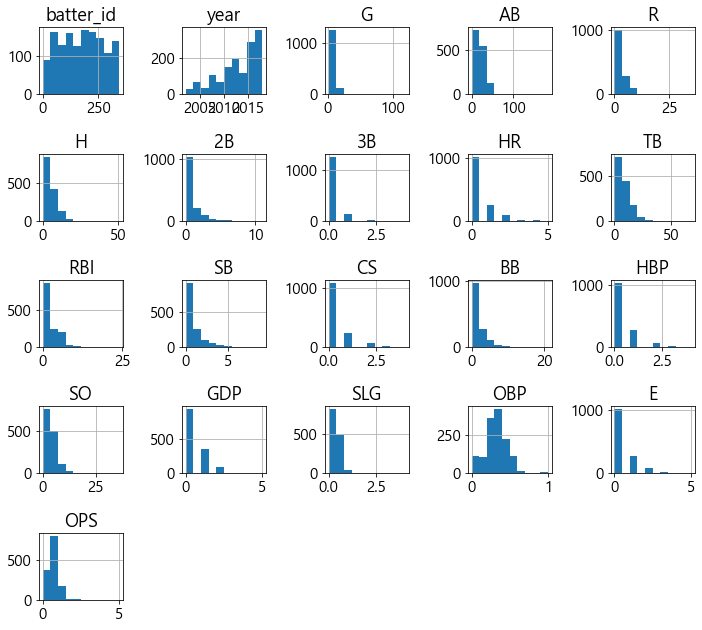

In [7]:
preseason_df.hist(figsize=(10, 9))
plt.tight_layout() #그래프 간격 설정
plt.show()

In [8]:
#정규시즌 데이터에서 2002년 이후의 연도별 기록된 선수의 수
regular_count = regular_season_df.groupby('year')['batter_id'].count().rename('regular') 
                #연도별로 그룹화 하고(groupby), 그 중에서 batter_id만 빈도수를 센 다음, 이름을 'regular'로 바꿔준다

#프리시즌 데이터에서 연도별 기록된 선수의 수
preseason_count = preseason_df.groupby('year')['batter_id'].count().rename('preseason')

#위 2개의 데이터 합치기(append보다 concat쓰는 습관을 기르자)
pd.concat([regular_count, preseason_count, np.round(preseason_count/regular_count, 2).rename('ratio')], axis = 1).transpose().loc[:,2002:]
             #axis = 1하면 양 옆으로 합치기
                #axis = 0이면 위 아래로 합치기
                    #여기서는 transpose해서 양 옆으로(axis =1) 합친다음, 행과 열을 바꿔주었다.
            #실제로 axis = 0을 하니까 'too many indexers'라는 에러가 나온다

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
regular,43.00,54.00,68.00,73.00,85.00,98.00,115.00,124.00,130.00,151.0,174.0,194.00,186.00,207.00,213.00,217.00,227.0
preseason,12.00,19.00,28.00,37.00,36.00,43.00,61.00,66.00,72.00,75.0,87.0,104.00,117.00,134.00,153.00,167.00,182.0
ratio,0.28,0.35,0.41,0.51,0.42,0.44,0.53,0.53,0.55,0.5,0.5,0.54,0.63,0.65,0.72,0.77,0.8


### 프리시즌과 정규시즌의 상관관계 분석
#### 두 데이터에 공통으로 존재하는 선수들의 기록만 사용

In [9]:
#타자 이름과 연도를 이용해 새로운 인덱스를 생성
regular_season_df['new_idx'] = regular_season_df['batter_name'] + regular_season_df['year'].apply(str) #'year'을 string type으로 변환
preseason_df['new_idx'] = preseason_df['batter_name'] + preseason_df['year'].apply(str)

In [10]:
#새로운 인덱스의 교집합 구하기
intersection_idx = list(set(regular_season_df['new_idx']).intersection(preseason_df['new_idx']))
        #intersection => 교집합 반환!
            #주로 set_1.intersection(set_2) 이런 식으로 쓰인다

intersection_idx

['남태혁2016',
 '김주형2013',
 '김강민2010',
 '김인태2017',
 '양의지2018',
 '정훈2016',
 '김지수2014',
 '전준우2017',
 '강한울2014',
 '김주형2011',
 '이명기2013',
 '정상호2010',
 '백용환2016',
 '김강민2005',
 '최진행2013',
 '이해창2018',
 '장민석2014',
 '오태곤2017',
 '이성열2012',
 '주효상2016',
 '이종욱2006',
 '손아섭2018',
 '최정2010',
 '서건창2012',
 '이택근2008',
 '박용택2012',
 '황윤호2018',
 '황재균2011',
 '김상수2012',
 '백상원2014',
 '이택근2016',
 '김태균2012',
 '최정2006',
 '임훈2012',
 '양성우2012',
 '이종욱2008',
 '강백호2018',
 '박석민2018',
 '이대형2009',
 '윤석민2015',
 '이대형2007',
 '오재원2010',
 '이대호2002',
 '김태진2016',
 '김상수2014',
 '강민호2010',
 '정상호2011',
 '박정권2007',
 '이재원2016',
 '김주형2016',
 '신종길2014',
 '김태균2008',
 '이영욱2010',
 '장민석2015',
 '조동찬2002',
 '박정권2016',
 '홍재호2017',
 '손시헌2010',
 '문규현2010',
 '서건창2016',
 '정주현2018',
 '유한준2013',
 '박용택2010',
 '백용환2015',
 '강민호2016',
 '권정웅2016',
 '김회성2010',
 '박정권2009',
 '이재원2010',
 '조동찬2017',
 '양종민2009',
 '이대호2008',
 '윤진호2018',
 '정근우2012',
 '김현수2013',
 '최승준2015',
 '이범호2008',
 '정근우2005',
 '정경운2018',
 '최정2012',
 '정수빈2012',
 '박찬도2014',
 '이택근2009',
 '이용규2014

In [11]:
#교집합에 존재하는 데이터만 불러오기
regular_season_new = regular_season_df.loc[regular_season_df['new_idx'].apply(lambda x: x in intersection_idx)].copy()

regular_season_new = regular_season_new.sort_values(by = 'new_idx').reset_index(drop=True) #drop= True : 기존의 index를 버리고 재배열
                    #new_idx기준으로 오름차순 정렬                             #drop = False: 기존의 index가 자동으로 첫번째 열이 된다
                
regular_season_new

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,new_idx
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902,가르시아2018
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000,강경학2011
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686,강경학2014
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673,강경학2015
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489,강경학2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,342,황재균,2014,롯데,0.321,128,486,66,156,33,...,0.475,0.388,16,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.863,황재균2014
1354,342,황재균,2015,롯데,0.290,144,534,95,155,41,...,0.521,0.350,16,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.871,황재균2015
1355,342,황재균,2016,롯데,0.335,127,498,97,167,26,...,0.570,0.394,15,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.964,황재균2016
1356,342,황재균,2018,KT,0.296,142,530,76,157,41,...,0.526,0.358,17,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.884,황재균2018


In [12]:
#비교를 위해 index로 정렬
preseason_new = preseason_df.loc[preseason_df['new_idx'].apply(lambda x: x in intersection_idx)].copy()

preseason_new = preseason_new.sort_values('new_idx').reset_index(drop=True)
preseason_new

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,new_idx
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959,가르시아2018
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500,강경학2011
2,1,강경학,2014,한화,-,4,0,2,0,0,...,NaN,NaN,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NaN,강경학2014
3,1,강경학,2015,한화,0.130,10,23,3,3,0,...,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416,강경학2015
4,1,강경학,2016,한화,0.188,14,32,4,6,1,...,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493,강경학2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,342,황재균,2014,롯데,0.407,10,27,3,11,2,...,0.593,0.448,1,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,1.041,황재균2014
1354,342,황재균,2015,롯데,0.333,11,30,8,10,3,...,0.433,0.389,0,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.822,황재균2015
1355,342,황재균,2016,롯데,0.310,16,42,8,13,3,...,0.429,0.370,1,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.799,황재균2016
1356,342,황재균,2018,KT,0.250,6,16,3,4,1,...,0.500,0.333,3,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.833,황재균2018


In [13]:
#확인해보자
sum(regular_season_new['new_idx'] == preseason_new['new_idx'])

1358

#### 상관관계 계산

C:\Users\alsrl\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


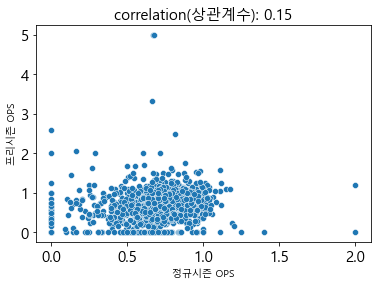

In [14]:
correlation = regular_season_new['OPS'].corr(preseason_new['OPS'])
sns.scatterplot(regular_season_new['OPS'], preseason_new['OPS'])
plt.title('correlation(상관계수): ' + str(np.round(correlation, 2)), fontsize = 15)
plt.xlabel('정규시즌 OPS', fontsize = 10)
plt.ylabel('프리시즌 OPS', fontsize = 10)
plt.show()

## 1-2. 정규시즌 데이터 분석

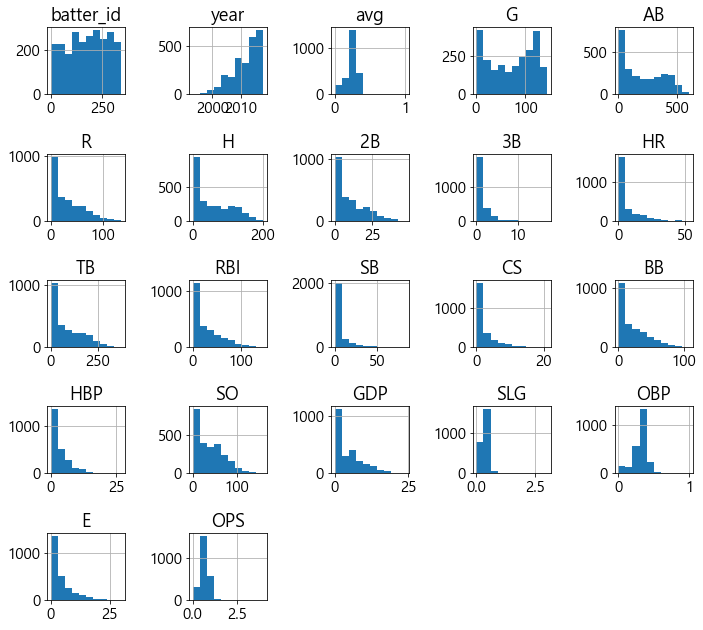

In [15]:
regular_season_df.hist(figsize = (10, 9))
plt.tight_layout()
plt.show()

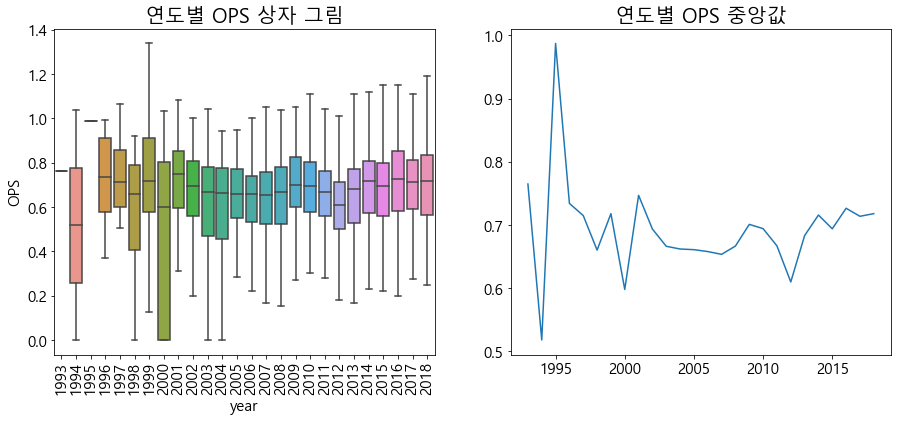

In [16]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
g= sns.boxplot(x = 'year', y = 'OPS', data = regular_season_df, showfliers= False)
g.set_title('연도별 OPS 상자 그림', size = 20)
g.set_xticklabels(g.get_xticklabels(), rotation = 90)

plt.subplot(1, 2, 2)
plt.plot(regular_season_df.groupby('year')['OPS'].median())
plt.title('연도별 OPS 중앙값', size = 20)
plt.show()

In [17]:
#데이터 확인하기
pd.crosstab(regular_season_df['year'], 'count').T #T => 전치시켜서 보기

#pd.crosstab(index, column)

        #결과적으로 2000년 이전 데이터 수가 적은 것을 확인

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
col_0,,,,,,,,,,,,,,,,,,,,,
count,1,2,1,7,8,10,14,20,32,43,...,124,130,151,174,194,186,207,213,217,227


In [18]:
#연도별 팀의 OPS 중앙값 계산
med_OPS_team = regular_season_df.pivot_table(index=['team'], columns = 'year', values = 'OPS', aggfunc='median')
med_OPS_team

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
team,,,,,,,,,,,,,,,,,,,,,
KIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.849337,0.829906,...,0.707000,0.725000,0.680963,0.615420,0.679763,0.751196,0.598500,0.777000,0.777000,0.7320
KT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.643561,0.634500,0.710791,0.6550
LG,NaN,0.000000,NaN,0.476212,0.679836,0.509843,0.637173,0.689250,0.698978,0.645345,...,0.704000,0.677000,0.626000,0.552501,0.653000,0.680809,0.678000,0.729000,0.703000,0.7040
NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.652500,0.636742,0.711000,0.703000,0.705000,0.6000
OB,NaN,NaN,NaN,NaN,0.615797,0.727667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.596491,0.393000,...,0.822977,0.689176,0.710000,0.666953,0.689636,0.751500,0.714000,0.798500,0.764796,0.7685
넥센,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.636166,0.623000,0.589000,0.671000,0.792032,0.753000,0.800500,0.743500,0.7650
두산,NaN,NaN,NaN,NaN,NaN,NaN,0.853830,0.739755,0.695808,0.762809,...,0.701938,0.780000,0.733000,0.660000,0.781500,0.702330,0.760000,0.763000,0.685000,0.8230
롯데,NaN,NaN,NaN,NaN,NaN,NaN,1.124961,0.453390,0.577847,0.577000,...,0.680000,0.653000,0.676715,0.581845,0.600000,0.689000,0.622000,0.704000,0.728000,0.7100


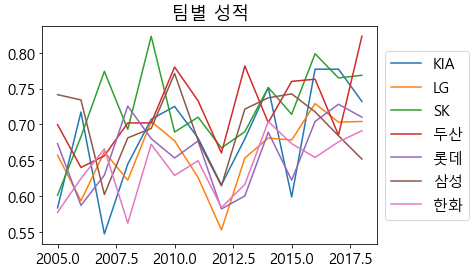

In [19]:
#2005년 이후 결측치가 존재하지 않는 팀만 확인
team_idx = med_OPS_team.loc[:, 2005:].isna().sum(axis= 1) <= 0

plt.plot(med_OPS_team.loc[team_idx, 2005:].T)
plt.legend(med_OPS_team.loc[team_idx, 2005:].T.columns, loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('팀별 성적')
plt.show()

In [20]:
team_idx

team
KIA      True
KT      False
LG       True
NC      False
OB      False
SK       True
넥센      False
두산       True
롯데       True
삼성       True
쌍방울     False
우리      False
한화       True
해태      False
현대      False
히어로즈    False
dtype: bool

### OPS와 다른 변인간의 관계

In [21]:
import re #정규표현식
#정규표현식 \d+ :하나 혹은 그 이상의 숫자만 찾는다
    # + 는 하나 혹은 그 이상 연결된 것이라는 뜻

regular_season_df['weight'] = regular_season_df['height/weight'].apply(lambda x: int(re.findall('\d+', x.split('/')[1])[0]) if pd.notnull(x) else x)
            #pd.notnull : 결측치가 아닌지 확인
                #결측치라면 오류가 날 수 있기 때문에, 결측치는 그대로 보내고, 결측치가 아닌 것에서만 정규방정식으로 분리


regular_season_df['height'] = regular_season_df['height/weight'].apply(lambda x: int(re.findall('\d+', x.split('/')[0])[0]) if pd.notnull(x) else x)

print(regular_season_df['height/weight'][0], regular_season_df['height'][0], regular_season_df['weight'][0])

177cm/93kg 177.0 93.0


C:\Users\alsrl\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\alsrl\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


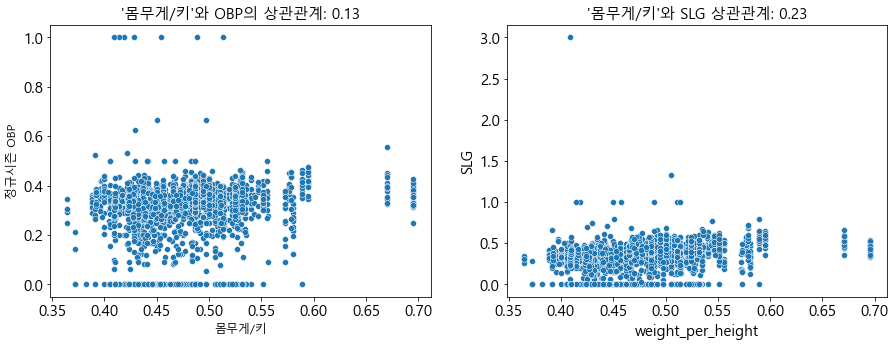

In [22]:
regular_season_df['weight_per_height'] = regular_season_df['weight'] / regular_season_df['height']
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)

#정규시즌에서 몸무게/키와 OBP의 상관관계 계산
correlation = regular_season_df['weight_per_height'].corr(regular_season_df['OBP'])
sns.scatterplot(regular_season_df['weight_per_height'], regular_season_df['OBP'])
plt.title("'몸무게/키'와 OBP의 상관관계: " + str(np.round(correlation, 2)), fontsize = 15)
plt.ylabel('정규시즌 OBP', fontsize = 12)
plt.xlabel('몸무게/키', fontsize= 12)
plt.subplot(1, 2, 2)

#정규시즌에서 몸무게/키와 SLG의 상관관계 계산
correlation = regular_season_df['weight_per_height'].corr(regular_season_df['SLG'])
sns.scatterplot(regular_season_df['weight_per_height'], regular_season_df['SLG'])
plt.title("'몸무게/키'와 SLG 상관관계: " + str(np.round(correlation, 2)), fontsize = 15)

plt.show()


In [23]:
#포지션과 관련된 정보
regular_season_df['position'].value_counts()

내야수(우투우타)    643
외야수(우투우타)    230
외야수(좌투좌타)    201
포수(우투우타)     189
외야수(우투좌타)    184
내야수(우투좌타)    141
내야수(좌투좌타)     36
포수(우투좌타)      14
외야수(우투양타)      7
내야수(우투양타)      7
Name: position, dtype: int64

In [24]:
#자세한 분석을 위해 내야수 등 포지션과, 주 사용 방향(우투우타 같은)을 분리
regular_season_df['pos'] = regular_season_df['position'].apply(lambda x: x.split('(')[0] if pd.notnull(x) else x)

#우투, 좌타, 양타
regular_season_df['hit_way'] = regular_season_df['position'].apply(lambda x: x[-3:-1] if pd.notnull(x) else x)

print(regular_season_df['position'][0], regular_season_df['pos'][0], regular_season_df['hit_way'][0])

내야수(우투우타) 내야수 우타


### 포지션과 OPS를 시각화 하여 살펴보기

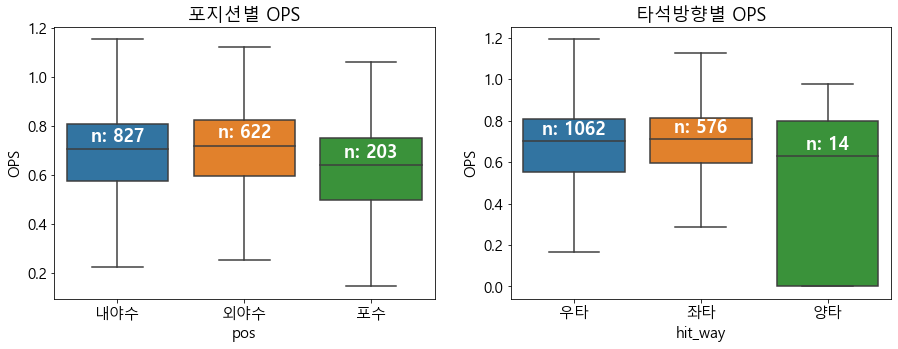

In [25]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
ax = sns.boxplot(x='pos', y = 'OPS', data = regular_season_df, showfliers = False)

#포지션 별 OPS중앙값
medians = regular_season_df.groupby(['pos'])['OPS'].median().to_dict()
                                 #포지션별로 그룹화하여 POS 확인 후 to_dict()로 dataframe을 dict로 변경

#포지션 별 관측치 수
nobs = regular_season_df['pos'].value_counts().to_dict()

#키 값을 'n: 값' 형식으로 변환
for key in nobs:
    nobs[key] = 'n: ' + str(nobs[key])
    
#그래프의 xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

#tick은 tick의 위치, label은 그에 해당하는 text값
for label in ax.get_xticklabels():
    ax.text(xticks_labels.index(label.get_text()), medians[label.get_text()] + 0.03, nobs[label.get_text()], 
           horizontalalignment = 'center', size = 'large', color = 'w', weight = 'semibold')

ax.set_title('포지션별 OPS')

plt.subplot(1, 2, 2)
ax = sns.boxplot(x = 'hit_way', y = 'OPS', data = regular_season_df, showfliers = False)

#타자 방향별 OPS중앙값
medians = regular_season_df.groupby(['hit_way'])['OPS'].median().to_dict()

#타자 방향 관측치 수
nobs = regular_season_df['hit_way'].value_counts().to_dict()

#키 값을 'n: 값' 형식으로 변환
for key in nobs:
    nobs[key] = 'n: ' + str(nobs[key])

#그래프의 xticks text값ㅅ 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

for label in ax.get_xticklabels():
    ax.text(xticks_labels.index(label.get_text()), medians[label.get_text()] + 0.03, nobs[label.get_text()],
           horizontalalignment = 'center', size= 'large', color = 'w', weight = 'semibold')
ax.set_title('타석방향별 OPS')

plt.show()


In [26]:
regular_season_df['career'].head()

0    쿠바 Ciego de Avila Maximo Gomez Baez(대)
1                         광주대성초-광주동성중-광주동성고
2                         광주대성초-광주동성중-광주동성고
3                         광주대성초-광주동성중-광주동성고
4                         광주대성초-광주동성중-광주동성고
Name: career, dtype: object

In [27]:
#career를 나누자
foreign_country = regular_season_df['career'].apply(lambda x: x.replace('-', ' ').split(' ')[0])

#외국만 추출
foreign_country_list = list(set(foreign_country.apply(lambda x: np.nan if '초' in x else x)))

foreign_country_list #결측치가 있음

#결측치 처리
foreign_country_list = [x for x in foreign_country_list if str(x) != 'nan']

foreign_country_list

['캐나다', '네덜란드', '미국', '도미니카', '쿠바']

#### 외국인과 내국인 성적 비교

In [28]:
regular_season_df['country'] = foreign_country
regular_season_df['country'] = regular_season_df['country'].apply(lambda x: x if pd.isnull(x) else ('foreign' if x in foreign_country_list else 'korean'))

In [29]:
regular_season_df[['country']].head(10)

,country
0,foreign
1,korean
2,korean
3,korean
4,korean
5,korean
6,korean
7,korean
8,korean
9,korean


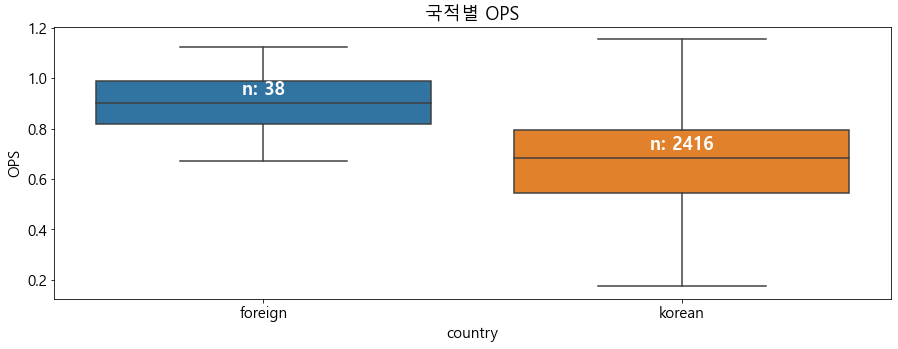

In [30]:
plt.figure(figsize=(15, 5))
ax = sns.boxplot(x = 'country', y = 'OPS', data = regular_season_df, showfliers = False)

#국적별 OPS 중앙값 dict
medians = regular_season_df.groupby(['country'])['OPS'].median().to_dict()

#내외국인 관측치 수를 dict로
nobs = regular_season_df['country'].value_counts().to_dict()

#키 값을 'n: 값'형식으로
for key in nobs: nobs[key] = 'n: ' + str(nobs[key])

#그래프의 Xticks text값 얻기
xticks_label = [item.get_text() for item in ax.get_xticklabels()]

for label in ax.get_xticklabels():
    ax.text(xticks_label.index(label.get_text()), medians[label.get_text()] + 0.03, nobs[label.get_text()],
           horizontalalignment= 'center', size = 'large', color ='w', weight = 'semibold')
ax.set_title('국적별 OPS')
plt.show()

#### 연봉과 OPS의 상관관계 분석

C:\Users\alsrl\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\alsrl\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


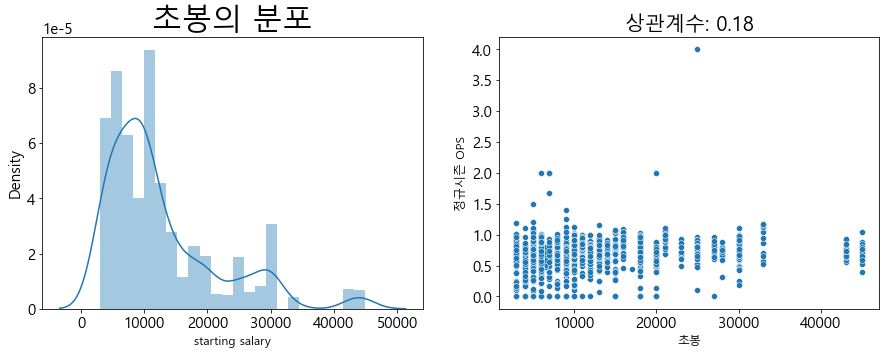

In [31]:
regular_season_df['starting_salary'] = regular_season_df['starting_salary'].apply(lambda x: x if pd.isnull(x) else(int(re.findall('\d+', x)[0]) if '만원' in x else np.nan))

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
b = sns.distplot(regular_season_df['starting_salary'].loc[regular_season_df['starting_salary'].notnull()], hist = True)
b.set_xlabel('starting salary', fontsize= 12)
b.set_title('초봉의 분포', fontsize=30)

plt.subplot(1, 2, 2)

#상관관계 분석
correlation = regular_season_df['starting_salary'].corr(regular_season_df['OPS'])
b= sns.scatterplot(regular_season_df['starting_salary'], regular_season_df['OPS'])
b.axes.set_title('상관계수: ' + str(np.round(correlation, 2)), fontsize= 20)
b.set_ylabel('정규시즌 OPS', fontsize = 12)
b.set_xlabel('초봉', fontsize = 12)
plt.show()

## 1-3. 일별 데이터 분석

In [32]:
day_by_day_df = pd.read_csv('Regular_Season_Batter_Day_by_Day_b4.csv')
display(day_by_day_df.shape, day_by_day_df.head())

(112273, 20)

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,0,0,0,0,1,0,1,0,0.333,2018
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,0,0,0,0,0,0,1,0,0.143,2018
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,0,0,0,0,0,0,0,0,0.167,2018
3,0,가르시아,3.28,넥센,0.200,5,1,1,0,0,0,1,0,0,0,0,0,0,0.176,2018
4,0,가르시아,3.29,넥센,0.250,4,0,1,0,0,0,3,0,0,0,0,0,1,0.190,2018


In [33]:
#날짜를 '.'기준으로 나누고 첫 번째 값을 월로 지정
day_by_day_df['month'] = day_by_day_df['date'].apply(lambda x:str(x).split('.')[0])

#각 연도의 월별 평균 누적 타율(avg2)계산
agg_df = day_by_day_df.groupby(['year', 'month'])['avg2'].mean().reset_index()

#pivot_table을 이용해 변경
agg_df = agg_df.pivot_table(index = ['month'], columns = 'year', values = 'avg2')
agg_df

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,,,,,,,,,,,
10,0.356400,0.269065,0.216583,0.203636,NaN,0.260985,0.249888,0.249638,0.033333,NaN,0.243526,0.246949,0.257841,0.273537,0.274042,0.282547,0.280289,0.277482
3,NaN,NaN,NaN,NaN,NaN,0.261714,0.261714,0.271982,NaN,0.239861,NaN,NaN,0.231236,0.210598,0.214485,0.257857,0.161979,0.238015
4,0.205217,0.319792,0.250296,0.259663,0.235317,0.267106,0.215703,0.261531,0.252546,0.262953,0.247133,0.234199,0.267994,0.259918,0.255175,0.266711,0.259430,0.263953
5,0.297157,0.267990,0.241491,0.237954,0.253527,0.264283,0.237329,0.262535,0.280842,0.272934,0.250877,0.247844,0.268355,0.273899,0.261307,0.275240,0.274374,0.274083
6,0.306926,0.275867,0.252290,0.248800,0.249913,0.264392,0.260600,0.270766,0.278781,0.274791,0.263264,0.254577,0.270533,0.283480,0.268999,0.276307,0.279060,0.280630
7,0.293171,0.266650,0.244230,0.251973,0.256396,0.262464,0.259171,0.264870,0.275054,0.265501,0.264829,0.261513,0.262812,0.275677,0.272685,0.283192,0.284565,0.280817
8,0.303489,0.270481,0.252319,0.249460,0.243570,0.265369,0.270258,0.265173,0.271796,0.271075,0.262048,0.258069,0.268122,0.282025,0.272377,0.283105,0.283283,0.283923
9,0.308636,0.248333,0.243780,0.203953,0.237058,0.258794,0.251022,0.252942,0.264468,0.265312,0.258500,0.251232,0.260571,0.272411,0.271629,0.276513,0.273213,0.277841


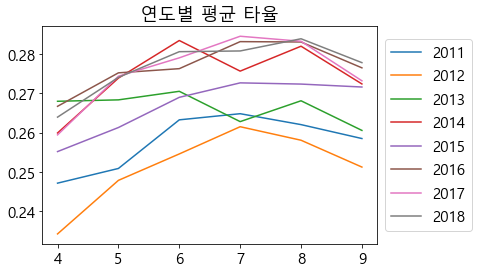

In [34]:
plt.plot(agg_df.iloc[2:, 10:])
plt.legend(agg_df.iloc[2:, 10:].columns, loc = 'center left', bbox_to_anchor = (1, 0.5)) 
plt.title('연도별 평균 타율')
plt.show()

# 데이터 전처리

In [35]:
pd.DataFrame(regular_season_df.isna().sum()).transpose()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,career,starting_salary,OPS,new_idx,weight,height,weight_per_height,pos,hit_way,country
0,0,0,0,0,26,0,0,0,0,0,...,0,1076,26,0,802,802,802,802,802,0


#### 수치형 변수에 대한 결측치 처리

In [36]:
#수치형 타입 변수 중에서 결측치가 존재하는지 확인
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols = regular_season_df.select_dtypes(include = numerics).columns
#isna().sum(axis = 1) #axis = 1 -> 열을 기준으로 결측치 개수 확인
regular_season_df.loc[regular_season_df[num_cols].isna().sum(axis =1) > 0, num_cols].head()

,batter_id,year,avg,G,AB,R,H,2B,3B,HR,...,SO,GDP,SLG,OBP,E,starting_salary,OPS,weight,height,weight_per_height
0,0,2018,0.339,50,183,27,62,9,0,8,...,25,3,0.519000,0.383000,9,NaN,0.902000,93.0,177.0,0.525424
12,138,2005,0.127,39,63,9,8,2,0,0,...,15,1,0.158730,0.256757,3,NaN,0.415487,NaN,NaN,NaN
13,138,2006,0.139,37,36,6,5,2,0,0,...,14,0,0.194444,0.326087,4,NaN,0.520531,NaN,NaN,NaN
14,138,2007,0.000,8,4,3,0,0,0,0,...,2,1,0.000000,0.000000,0,NaN,0.000000,NaN,NaN,NaN
15,138,2008,0.000,2,1,0,0,0,0,0,...,0,0,0.000000,0.000000,0,NaN,0.000000,NaN,NaN,NaN


In [37]:
#결측치를 0으로 채우기
regular_season_df[regular_season_df.select_dtypes(include=numerics).columns] = regular_season_df[regular_season_df.select_dtypes(include= numerics).columns].fillna(0)
regular_season_df

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,career,starting_salary,OPS,new_idx,weight,height,weight_per_height,pos,hit_way,country
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,쿠바 Ciego de Avila Maximo Gomez Baez(대),0.0,0.902,가르시아2018,93.0,177.0,0.525424,내야수,우타,foreign
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,광주대성초-광주동성중-광주동성고,10000.0,0.000,강경학2011,72.0,180.0,0.400000,내야수,좌타,korean
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,광주대성초-광주동성중-광주동성고,10000.0,0.686,강경학2014,72.0,180.0,0.400000,내야수,좌타,korean
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,광주대성초-광주동성중-광주동성고,10000.0,0.673,강경학2015,72.0,180.0,0.400000,내야수,좌타,korean
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,광주대성초-광주동성중-광주동성고,10000.0,0.489,강경학2016,72.0,180.0,0.400000,내야수,좌타,korean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,344,황진수,2014,롯데,0.000,5,5,0,0,0,...,석천초-대헌중-공주고,4000.0,0.000,황진수2014,82.0,181.0,0.453039,내야수,양타,korean
2450,344,황진수,2015,롯데,0.000,2,2,0,0,0,...,석천초-대헌중-공주고,4000.0,0.000,황진수2015,82.0,181.0,0.453039,내야수,양타,korean
2451,344,황진수,2016,롯데,0.000,11,10,2,0,0,...,석천초-대헌중-공주고,4000.0,0.000,황진수2016,82.0,181.0,0.453039,내야수,양타,korean
2452,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,석천초-대헌중-공주고,4000.0,0.761,황진수2017,82.0,181.0,0.453039,내야수,양타,korean


In [38]:
#일별 데이터도 결측치를 0으로 채우기
day_by_day_df[day_by_day_df.select_dtypes(include=numerics).columns] = day_by_day_df[day_by_day_df.select_dtypes(include=numerics).columns].fillna(0)
day_by_day_df

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,...,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year,month
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,...,0,0,0,1,0,1,0,0.333,2018,3
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,...,0,0,0,0,0,1,0,0.143,2018,3
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,...,0,0,0,0,0,0,0,0.167,2018,3
3,0,가르시아,3.28,넥센,0.200,5,1,1,0,0,...,1,0,0,0,0,0,0,0.176,2018,3
4,0,가르시아,3.29,넥센,0.250,4,0,1,0,0,...,3,0,0,0,0,0,1,0.190,2018,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112268,344,황진수,6.23,LG,-,0,0,0,0,0,...,0,0,0,1,0,0,0,0.158,2018,6
112269,344,황진수,6.26,넥센,0.000,1,0,0,0,0,...,0,0,0,0,0,1,0,0.150,2018,6
112270,344,황진수,6.27,넥센,0.500,2,1,1,1,0,...,0,0,0,0,0,1,0,0.182,2018,6
112271,344,황진수,6.28,넥센,-,0,0,0,0,0,...,0,0,0,0,0,0,0,0.182,2018,6


In [39]:
#프리시즌 데이터도 결측치를 0으로 채우기
preseason_df[preseason_df.select_dtypes(include=numerics).columns] = preseason_df[preseason_df.select_dtypes(include=numerics).columns].fillna(0)
preseason_df

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,new_idx
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959,가르시아2018
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500,강경학2011
2,1,강경학,2014,한화,-,4,0,2,0,0,...,0.000,0.000,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000,강경학2014
3,1,강경학,2015,한화,0.130,10,23,3,3,0,...,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416,강경학2015
4,1,강경학,2016,한화,0.188,14,32,4,6,1,...,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493,강경학2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,342,황재균,2014,롯데,0.407,10,27,3,11,2,...,0.593,0.448,1,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,1.041,황재균2014
1389,342,황재균,2015,롯데,0.333,11,30,8,10,3,...,0.433,0.389,0,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.822,황재균2015
1390,342,황재균,2016,롯데,0.310,16,42,8,13,3,...,0.429,0.370,1,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.799,황재균2016
1391,342,황재균,2018,KT,0.250,6,16,3,4,1,...,0.500,0.333,3,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.833,황재균2018


#### 수치형 변수가 아닌 것에 대한 결측치 처리
- 분석과정에 쓰이지 않는다면 그냥 삭제

In [40]:
#수치형이 아닌 변수 추출
not_num_cols = [x for x in regular_season_df.columns if x not in num_cols]

#수치형이 아닌 변수 중 결측치 확인
regular_season_df.loc[regular_season_df[not_num_cols].isna().sum(axis =1) > 0, not_num_cols].head()

,batter_name,team,height/weight,year_born,position,career,new_idx,pos,hit_way,country
12,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,백승룡2005,NaN,NaN,korean
13,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,백승룡2006,NaN,NaN,korean
14,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,백승룡2007,NaN,NaN,korean
15,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,백승룡2008,NaN,NaN,korean
16,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,백승룡2011,NaN,NaN,korean


In [41]:
# 삭제할 데이터 추출
drop_idx = regular_season_df.loc[
    #안타가 0개이상이면서 장타율이 0
    ((regular_season_df['H'] > 0) & (regular_season_df['SLG'] == 0)) |
    
    #안타가 0개 이상 혹은 볼넷이 0개 이상 혹은 몸에 맞은 볼이 0개 이상이면서
    #출루율이 0인 경우
    (((regular_season_df['H'] > 0) | (regular_season_df['BB'] > 0) | (regular_season_df['HBP'] > 0)) & (regular_season_df['OBP'] == 0))
].index

# 데이터 삭제
regular_season_df = regular_season_df.drop(drop_idx).reset_index(drop = True)
regular_season_df

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,career,starting_salary,OPS,new_idx,weight,height,weight_per_height,pos,hit_way,country
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,쿠바 Ciego de Avila Maximo Gomez Baez(대),0.0,0.902,가르시아2018,93.0,177.0,0.525424,내야수,우타,foreign
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,광주대성초-광주동성중-광주동성고,10000.0,0.000,강경학2011,72.0,180.0,0.400000,내야수,좌타,korean
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,광주대성초-광주동성중-광주동성고,10000.0,0.686,강경학2014,72.0,180.0,0.400000,내야수,좌타,korean
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,광주대성초-광주동성중-광주동성고,10000.0,0.673,강경학2015,72.0,180.0,0.400000,내야수,좌타,korean
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,광주대성초-광주동성중-광주동성고,10000.0,0.489,강경학2016,72.0,180.0,0.400000,내야수,좌타,korean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2442,344,황진수,2014,롯데,0.000,5,5,0,0,0,...,석천초-대헌중-공주고,4000.0,0.000,황진수2014,82.0,181.0,0.453039,내야수,양타,korean
2443,344,황진수,2015,롯데,0.000,2,2,0,0,0,...,석천초-대헌중-공주고,4000.0,0.000,황진수2015,82.0,181.0,0.453039,내야수,양타,korean
2444,344,황진수,2016,롯데,0.000,11,10,2,0,0,...,석천초-대헌중-공주고,4000.0,0.000,황진수2016,82.0,181.0,0.453039,내야수,양타,korean
2445,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,석천초-대헌중-공주고,4000.0,0.761,황진수2017,82.0,181.0,0.453039,내야수,양타,korean


#### 규정 타수를 정의

In [42]:
# OPS 이상치 탐색을 위한 수치 정의
Q1 = regular_season_df['OPS'].quantile(0.25)
Q3 = regular_season_df['OPS'].quantile(0.75)
IQR = Q3 - Q1

#실제 OPS이상치 탐색
regular_season_df.loc[(regular_season_df['OPS'] < (Q1 - 1.5 * IQR)) | 
                      (regular_season_df['OPS'] > (Q3 + 1.5 * IQR))].sort_values(by = ['AB'], axis = 0, ascending = False)[[
    'batter_name', 'AB', 'year', 'OPS'
]].head(10)

,batter_name,AB,year,OPS
2329,테임즈,472,2015,1.293656
97,강정호,418,2014,1.200156
1318,유재신,33,2018,1.192000
416,김원섭,25,2005,0.116923
1543,이여상,22,2013,0.090909
681,문규현,18,2007,0.109000
578,김회성,17,2010,0.105000
1902,정병곤,15,2018,0.130000
1874,정경운,15,2018,0.130000
2384,현재윤,15,2014,1.229167


#### 시간변수(시간 반영)

In [43]:
#시간 변수를 생성하는 함수 정의
def lag_function(df, var_name, past):
    #df = 시간 변수를 생성할 데이터 프레임
    #var_name = 시간변수 생성의 대상이 되는 변수 이름
    # past = 몇 년 전의 성적을 생성할지 결정(정수)
    
    df.reset_index(drop = True, inplace = True)
    #시간변수 생성
    df['lag' + str(past) + '_' + var_name] = np.nan
    df['lag' + str(past) + '_' + 'AB'] = np.nan
    
    for col in ['AB', var_name]:
        for i in range(0, (max(df.index) + 1)):
            val = df.loc[(df['batter_name'] == df['batter_name'][i]) & (df['year'] == df['year'][i] - past), col]
            
            #과거 기록이 결측치가 아니라면 값을 넣는다
            if len(val) != 0:
                df.loc[i, 'lag' + str(past) + '_' + 'col'] = val.iloc[0]
    
    #30타수 미만 결측치 처리
    df.loc[df['lag' + str(past) + '_' + 'AB'] < 30, 'lag' + str(past) + '_' + var_name] = np.nan
    df.drop('lag' + str(past) + '_' + 'AB', axis = 1, inplace = True)
    
    return df


#### 추가 변수 생성(희생 플라이)
- SF(희생플라이) =  (H + BB + HBP)/OBP - (AB + BB + HBP)

In [44]:
regular_season_df['SF'] = regular_season_df[['H', 'BB', 'HBP']].sum(axis= 1) / regular_season_df['OBP'] - regular_season_df[[
    'AB', 'BB', 'HBP'
]].sum(axis = 1)
regular_season_df['SF'].fillna(0, inplace = True)
regular_season_df['SF'] = regular_season_df['SF'].apply(lambda x: round(x, 0))


#한 타수당 평균 희생 플라이 계산 후 필요한 것만 추출
regular_season_df['SF_1'] = regular_season_df['SF'] / regular_season_df['AB']
regular_season_df_SF = regular_season_df[['batter_name', 'year', 'SF_1']]
regular_season_df_SF

,batter_name,year,SF_1
0,가르시아,2018,0.032787
1,강경학,2011,0.000000
2,강경학,2014,-0.000000
3,강경학,2015,0.009646
4,강경학,2016,0.009901
...,...,...,...
2442,황진수,2014,0.000000
2443,황진수,2015,0.000000
2444,황진수,2016,0.000000
2445,황진수,2017,0.008547


In [45]:
#일별 데이터에서 연도별 선수의 시즌 상반기 출루율과 관련된 성적 합 구하기
sum_hf_yr_OBP = day_by_day_df.loc[day_by_day_df['date'] <= 7.18].groupby(['batter_name', 'year'])['AB', 'H', 'BB', 'HBP'].sum().reset_index()

#희생플라이 관련 데이터 합치기
sum_hf_yr_OBP = sum_hf_yr_OBP.merge(regular_season_df_SF, how = 'left', on = ['batter_name', 'year'])

#선수별 상반기 희생 플라이 수 계산
sum_hf_yr_OBP['SF'] = (sum_hf_yr_OBP['SF_1'] * sum_hf_yr_OBP['AB']).apply(lambda x: round(x, 0))
sum_hf_yr_OBP.drop('SF_1', axis =1, inplace = True)

#선수별 상반기 출루율 계산
sum_hf_yr_OBP['OBP'] = sum_hf_yr_OBP[['H', 'BB', 'HBP']].sum(axis = 1) / sum_hf_yr_OBP[['AB', 'BB', 'HBP', 'SF']].sum(axis = 1)

#결측치를 0으로 처리
sum_hf_yr_OBP['OBP'].fillna(0, inplace = True)

#분석에 필요없는 열 제거
sum_hf_yr_OBP = sum_hf_yr_OBP[['batter_name', 'year', 'AB', 'OBP']]
sum_hf_yr_OBP

C:\Users\alsrl\AppData\Local\Temp\ipykernel_9332\995354670.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_hf_yr_OBP = day_by_day_df.loc[day_by_day_df['date'] <= 7.18].groupby(['batter_name', 'year'])['AB', 'H', 'BB', 'HBP'].sum().reset_index()


,batter_name,year,AB,OBP
0,가르시아,2018,85,0.418367
1,강경학,2011,1,0.000000
2,강경학,2014,0,1.000000
3,강경학,2015,156,0.342541
4,강경학,2016,81,0.222222
...,...,...,...,...
1381,황진수,2012,4,0.400000
1382,황진수,2013,0,0.000000
1383,황진수,2016,9,0.000000
1384,황진수,2017,71,0.316456


#### 추가변수 생성(나이 변수)

In [46]:
regular_season_df['age'] = regular_season_df['year'] - regular_season_df['year_born'].apply(lambda x: int(x[:4]))

#나이, 평균 출루율, 출루율 중앙값으로 구성된 데이터프레임 구축
temp_df  = regular_season_df.loc[regular_season_df['AB'] >= 30].groupby('age').agg({'OBP':['mean', 'median']}).reset_index()
temp_df.columns = temp_df.columns.droplevel() #droplevel -> 인덱스 제거
temp_df.columns = ['age', 'mean_OBP', 'median_OBP']

In [47]:
#나이를 포함한 변수 선택
sum_hf_yr_OBP = sum_hf_yr_OBP.merge(regular_season_df[['batter_name', 'year', 'age']], how = 'left', on = ['batter_name', 'year'])

#총 3년 전 성적까지 변수를 생성
sum_hf_yr_OBP = lag_function(sum_hf_yr_OBP, 'OBP', 1)
sum_hf_yr_OBP = lag_function(sum_hf_yr_OBP, 'OBP', 2)
sum_hf_yr_OBP = lag_function(sum_hf_yr_OBP, 'OBP', 3)
sum_hf_yr_OBP

,batter_name,year,AB,OBP,age,lag1_OBP,lag1_col,lag2_OBP,lag2_col,lag3_OBP,lag3_col
0,가르시아,2018,85,0.418367,33,NaN,NaN,NaN,NaN,NaN,NaN
1,강경학,2011,1,0.000000,19,NaN,NaN,NaN,NaN,NaN,NaN
2,강경학,2014,0,1.000000,22,NaN,NaN,NaN,NaN,NaN,0.0
3,강경학,2015,156,0.342541,23,NaN,1.000000,NaN,NaN,NaN,NaN
4,강경학,2016,81,0.222222,24,NaN,0.342541,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1381,황진수,2012,4,0.400000,23,NaN,NaN,NaN,NaN,NaN,NaN
1382,황진수,2013,0,0.000000,24,NaN,0.400000,NaN,NaN,NaN,NaN
1383,황진수,2016,9,0.000000,27,NaN,NaN,NaN,NaN,NaN,0.0
1384,황진수,2017,71,0.316456,28,NaN,0.000000,NaN,NaN,NaN,NaN


In [48]:
#선수별 OBP 평균
player_OBP_mean = regular_season_df.loc[regular_season_df['AB'] >= 30].groupby('batter_name')['AB', 'H', 'BB', 'HBP', 'SF'].sum().reset_index()
player_OBP_mean['mean_OBP'] = player_OBP_mean[['H', 'BB', 'HBP']].sum(axis = 1) / player_OBP_mean[['AB', 'BB', 'HBP', 'SF']].sum(axis=1)

#시즌별 OBP 평균
season_OBP_mean = regular_season_df.loc[regular_season_df['AB'] >= 30].groupby('year')['AB', 'H', 'BB', 'HBP', 'SF'].sum().reset_index()
season_OBP_mean['mean_OBP'] = season_OBP_mean[['H', 'BB','HBP']].sum(axis = 1) /season_OBP_mean[['AB', 'BB', 'HBP', 'SF']].sum(axis = 1)
season_OBP_mean = season_OBP_mean[['year', 'mean_OBP']]

#선수 평균(player_OBP_mean)열 추가
sum_hf_yr_OBP = sum_hf_yr_OBP.merge(player_OBP_mean[['batter_name', 'mean_OBP']], how = 'left', on = 'batter_name')

sum_hf_yr_OBP = sum_hf_yr_OBP.loc[~sum_hf_yr_OBP['mean_OBP'].isna()].reset_index(drop= True)
sum_hf_yr_OBP

C:\Users\alsrl\AppData\Local\Temp\ipykernel_9332\2688153953.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  player_OBP_mean = regular_season_df.loc[regular_season_df['AB'] >= 30].groupby('batter_name')['AB', 'H', 'BB', 'HBP', 'SF'].sum().reset_index()
C:\Users\alsrl\AppData\Local\Temp\ipykernel_9332\2688153953.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  season_OBP_mean = regular_season_df.loc[regular_season_df['AB'] >= 30].groupby('year')['AB', 'H', 'BB', 'HBP', 'SF'].sum().reset_index()


,batter_name,year,AB,OBP,age,lag1_OBP,lag1_col,lag2_OBP,lag2_col,lag3_OBP,lag3_col,mean_OBP
0,가르시아,2018,85,0.418367,33,NaN,NaN,NaN,NaN,NaN,NaN,0.383495
1,강경학,2011,1,0.000000,19,NaN,NaN,NaN,NaN,NaN,NaN,0.337880
2,강경학,2014,0,1.000000,22,NaN,NaN,NaN,NaN,NaN,0.0,0.337880
3,강경학,2015,156,0.342541,23,NaN,1.000000,NaN,NaN,NaN,NaN,0.337880
4,강경학,2016,81,0.222222,24,NaN,0.342541,NaN,1.0,NaN,NaN,0.337880
...,...,...,...,...,...,...,...,...,...,...,...,...
1347,황진수,2012,4,0.400000,23,NaN,NaN,NaN,NaN,NaN,NaN,0.358779
1348,황진수,2013,0,0.000000,24,NaN,0.400000,NaN,NaN,NaN,NaN,0.358779
1349,황진수,2016,9,0.000000,27,NaN,NaN,NaN,NaN,NaN,0.0,0.358779
1350,황진수,2017,71,0.316456,28,NaN,0.000000,NaN,NaN,NaN,NaN,0.358779


#### 결측치 처리하는 함수 정의

In [49]:
def lag_na_fill(data_set, var_name, past, season_var_mean_data):
    for i in range(0, len(data_set)):
        if np.isnan(data_set['lag' + str(past) + '_' + var_name][i]):
            data_set.loc[i,['lag' + str(past) + '_' + var_name]] = (data_set['mean' + '_' + var_name][i] 
                                                                    + season_var_mean_data.loc[season_var_mean_data['year']== (data_set['year'][i] - past), 
                                                                            'mean_' + var_name].iloc[0]) /2
    return data_set

In [50]:
# 함수를 이용해 결측치 처리 진행
sum_hf_yr_OBP = lag_na_fill(sum_hf_yr_OBP, 'OBP', 1, season_OBP_mean)
sum_hf_yr_OBP = lag_na_fill(sum_hf_yr_OBP, 'OBP', 2, season_OBP_mean)
sum_hf_yr_OBP = lag_na_fill(sum_hf_yr_OBP, 'OBP', 3, season_OBP_mean)

### SLG데이터 전처리
- 사실 OPS 예측에 사용되는 데이터는 OBP와 SLG.

In [51]:
numeric_cols = list(regular_season_df.select_dtypes(include=numerics).drop(['batter_id', 'year', 'OPS', 'OBP'], axis = 1).columns)
regular_season_temp = regular_season_df[numeric_cols + ['year', 'batter_name']].copy()
regular_season_temp = regular_season_temp.loc[regular_season_temp['AB'] >= 30]

#시간변수 생성 함수를 통한 지표별 1년 전 성적 추출
for col in numeric_cols:
    regular_season_temp = lag_function(regular_season_temp, col, 1)

numeric_cols.remove('SLG')
regular_season_temp.drop(numeric_cols, axis = 1, inplace = True)

#상관관계 도출
corr_matrix = regular_season_temp.corr()
corr_matrix = corr_matrix.sort_values(by = 'SLG', axis =0, ascending = False)
corr_matrix = corr_matrix[corr_matrix.index]

In [52]:
#일별 데이터에서 연도별 선수의 시즌 상반기 장타율(SLG)와 관련된 성적 합 구하기
sum_hf_yr_SLG = day_by_day_df.loc[day_by_day_df['date'] <= 7.18 ].groupby(['batter_name', 'year'])['AB', 'H', '2B', '3B', 'HR'].sum().reset_index()

#상반기 SLG계산
sum_hf_yr_SLG['SLG'] = (sum_hf_yr_SLG['H'] - sum_hf_yr_SLG[['2B', '3B', 'HR']].sum(axis = 1) + 
                       sum_hf_yr_SLG['2B']*2 + sum_hf_yr_SLG['3B']*3 + sum_hf_yr_SLG['HR']*4) / sum_hf_yr_SLG['AB']

#SLG결측치를 0으로 처리
sum_hf_yr_SLG['SLG'].fillna(0, inplace = True)

#필요한 칼럼만 불러오고 나이 계산
sum_hf_yr_SLG = sum_hf_yr_SLG[['batter_name', 'year', 'AB', 'SLG']]
sum_hf_yr_SLG = sum_hf_yr_SLG.merge(regular_season_df[['batter_name', 'year', 'age']], how = 'left', on = ['batter_name', 'year'])
sum_hf_yr_SLG.head(10)

C:\Users\alsrl\AppData\Local\Temp\ipykernel_9332\2782876981.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_hf_yr_SLG = day_by_day_df.loc[day_by_day_df['date'] <= 7.18 ].groupby(['batter_name', 'year'])['AB', 'H', '2B', '3B', 'HR'].sum().reset_index()


,batter_name,year,AB,SLG,age
0,가르시아,2018,85,0.552941,33
1,강경학,2011,1,0.000000,19
2,강경학,2014,0,0.000000,22
3,강경학,2015,156,0.333333,23
4,강경학,2016,81,0.222222,24
5,강경학,2017,82,0.256098,25
6,강경학,2018,126,0.523810,26
7,강구성,2016,2,0.000000,23
8,강구성,2017,1,0.000000,24
9,강구성,2018,5,0.400000,25


In [53]:
#총 3년 전 성적까지 변수를 생성
sum_hf_yr_SLG = lag_function(sum_hf_yr_SLG, 'SLG', 1)
sum_hf_yr_SLG = lag_function(sum_hf_yr_SLG, 'SLG', 2)
sum_hf_yr_SLG = lag_function(sum_hf_yr_SLG, 'SLG', 3)

round(sum_hf_yr_SLG[['lag1_SLG', 'lag2_SLG', 'lag3_SLG']].isna().sum() / sum_hf_yr_SLG.shape[0], 2)

lag1_SLG    1.0
lag2_SLG    1.0
lag3_SLG    1.0
dtype: float64

In [54]:
display(sum_hf_yr_SLG.head())

,batter_name,year,AB,SLG,age,lag1_SLG,lag1_col,lag2_SLG,lag2_col,lag3_SLG,lag3_col
0,가르시아,2018,85,0.552941,33,NaN,NaN,NaN,NaN,NaN,NaN
1,강경학,2011,1,0.000000,19,NaN,NaN,NaN,NaN,NaN,NaN
2,강경학,2014,0,0.000000,22,NaN,NaN,NaN,NaN,NaN,0.0
3,강경학,2015,156,0.333333,23,NaN,0.000000,NaN,NaN,NaN,NaN
4,강경학,2016,81,0.222222,24,NaN,0.333333,NaN,0.0,NaN,NaN


In [55]:
#선수별 SLG 평균 데이터 만들기
player_SLG_mean = regular_season_df.loc[regular_season_df['AB'] >= 30].groupby('batter_name')['AB', 'H', '2B', '3B', 'HR'].sum().reset_index()


C:\Users\alsrl\AppData\Local\Temp\ipykernel_9332\3868095375.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  player_SLG_mean = regular_season_df.loc[regular_season_df['AB'] >= 30].groupby('batter_name')['AB', 'H', '2B', '3B', 'HR'].sum().reset_index()


In [56]:
player_SLG_mean['mean_SLG'] = (player_SLG_mean['H'] - player_SLG_mean[['2B', '3B', 'HR']].sum(axis=1) + 
                              player_SLG_mean['2B']*2 + player_SLG_mean['3B']*3 + player_SLG_mean['HR']*4) / player_SLG_mean['AB']
#시즌별 SLG평균 데이터 만들기
season_SLG_mean = regular_season_df.loc[regular_season_df['AB'] >= 30].groupby('year')['AB', 'H', '2B', '3B', 'HR'].sum().reset_index()
season_SLG_mean['mean_SLG'] = (season_SLG_mean['H'] - season_SLG_mean[['2B', '3B','HR']].sum(axis=1) + 
                               season_SLG_mean['2B']*2 + season_SLG_mean['3B']*3 + season_SLG_mean['HR']*4) / season_SLG_mean['AB']

#선수 평균의 SLG를 새로운 변수로 더하기
sum_hf_yr_SLG = sum_hf_yr_SLG.merge(player_SLG_mean[['batter_name', 'mean_SLG']], how='left', on='batter_name')

#선수 평균의 성적이 결측치이면 제거
sum_hf_yr_SLG = sum_hf_yr_SLG.loc[~sum_hf_yr_SLG['mean_SLG'].isna()].reset_index(drop=True)

#결측치 처리
sum_hf_yr_SLG = lag_na_fill(sum_hf_yr_SLG, 'SLG', 1, season_SLG_mean)
sum_hf_yr_SLG = lag_na_fill(sum_hf_yr_SLG, 'SLG', 2, season_SLG_mean)
sum_hf_yr_SLG = lag_na_fill(sum_hf_yr_SLG, 'SLG', 3, season_SLG_mean)

round(sum_hf_yr_SLG[['lag1_SLG', 'lag2_SLG', 'lag3_SLG']].isna().sum() / sum_hf_yr_SLG.shape[0], 2)

C:\Users\alsrl\AppData\Local\Temp\ipykernel_9332\317893062.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  season_SLG_mean = regular_season_df.loc[regular_season_df['AB'] >= 30].groupby('year')['AB', 'H', '2B', '3B', 'HR'].sum().reset_index()


lag1_SLG    0.0
lag2_SLG    0.0
lag3_SLG    0.0
dtype: float64

In [57]:
display(sum_hf_yr_SLG.head())

,batter_name,year,AB,SLG,age,lag1_SLG,lag1_col,lag2_SLG,lag2_col,lag3_SLG,lag3_col,mean_SLG
0,가르시아,2018,85,0.552941,33,0.481855,NaN,0.481498,NaN,0.476627,NaN,0.519126
1,강경학,2011,1,0.000000,19,0.372902,NaN,0.380882,NaN,0.361716,NaN,0.332527
2,강경학,2014,0,0.000000,22,0.362931,NaN,0.349344,NaN,0.359616,0.0,0.332527
3,강경학,2015,156,0.333333,23,0.389415,0.000000,0.362931,NaN,0.349344,NaN,0.332527
4,강경학,2016,81,0.222222,24,0.383328,0.333333,0.389415,0.0,0.362931,NaN,0.332527


In [58]:
sum_hf_yr_OBP = sum_hf_yr_OBP.drop(['lag1_col', 'lag2_col', 'lag3_col'], axis = 1)
sum_hf_yr_SLG = sum_hf_yr_SLG.drop(['lag1_col', 'lag2_col', 'lag3_col'], axis = 1)

In [59]:
sum_hf_yr_OBP.shape

(1352, 9)

# 모델 구축과 검증

## 데이터 분할

In [60]:
#30타수 이상의 데이터만 학습
sum_hf_yr_OBP = sum_hf_yr_OBP.loc[sum_hf_yr_OBP['AB'] >= 30]
sum_hf_yr_SLG = sum_hf_yr_SLG.loc[sum_hf_yr_SLG['AB'] >= 30]

#2018년 데이터를 test데이터, 2018년 이전의 데이터를 train으로
OBP_train = sum_hf_yr_OBP.loc[sum_hf_yr_OBP['year'] != 2018]
OBP_test = sum_hf_yr_OBP.loc[sum_hf_yr_OBP['year'] == 2018]

SLG_train = sum_hf_yr_SLG.loc[sum_hf_yr_SLG['year'] != 2018]
SLG_test = sum_hf_yr_SLG.loc[sum_hf_yr_SLG['year'] == 2018]

print(OBP_train.shape, OBP_test.shape, SLG_train.shape, SLG_test.shape)

(872, 9) (150, 9) (872, 9) (150, 9)


In [61]:
#대회의 평가 기준에 맞는 평가지표 생성
def wrmse(v, w, p):
    #v: 실제 값
    #w: 타수
    #p: 예측값
    return sum(np.sqrt(((v - p)**2 * w) / sum(w)))

## 릿지와 라쏘(회귀)

In [62]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# log 단위로 1.e -0.4 ~ 1.e+0.1사이의 구간에 대해 parameter 검색
lasso_params = {'alpha': np.logspace(-4, 1, 6)}
ridge_params = {'alpha': np.logspace(-4, 1, 6)}


#그리드서치를 이용하여 dict에 라쏘와 릿지 모델 저장
OBP_linear_models = {
    'Lasso': GridSearchCV(Lasso(), param_grid=lasso_params).fit(OBP_train.iloc[:, -5:], OBP_train['OBP']).best_estimator_,
    'Ridge': GridSearchCV(Ridge(), param_grid=ridge_params).fit(OBP_train.iloc[:, -5:], OBP_train['OBP']).best_estimator_,
}

SLG_linear_models = {
    'Lasso': GridSearchCV(Lasso(), param_grid=lasso_params).fit(SLG_train.iloc[:, -5:], SLG_train['SLG']).best_estimator_,
    'Ridge': GridSearchCV(Ridge(), param_grid=ridge_params).fit(SLG_train.iloc[:, -5:], SLG_train['SLG']).best_estimator_,
}


## 랜덤 포레스트

In [71]:
import time
from sklearn.ensemble import RandomForestRegressor
start = time.time() #시작 시간 저장

#랜덤 포레스트의 파라미터 범위 지정
RF_params = {
    'n_estimators':[50, 100, 150, 200, 300, 500, 1000],
    'max_features':['auto','sqrt'],
    'max_depth':[1, 2, 3, 5, 6, 10],
    'min_samples_leaf':[1, 2, 4],
    'min_samples_split':[2, 3, 5, 10]
}

#그리드서치를 이용하여 dict에 랜덤포레스트 저장
OBP_RF_models = {
    'RF': GridSearchCV(RandomForestRegressor(random_state=42), param_grid=RF_params, n_jobs=1).fit(OBP_train.iloc[:, -5:], OBP_train['OBP']).best_estimator_
}

SLG_RF_models = {
    'RF': GridSearchCV(RandomForestRegressor(random_state=42), param_grid=RF_params, n_jobs=1).fit(SLG_train.iloc[:, -5:], SLG_train['SLG']).best_estimator_
}


print(f'걸린 시간: {np.round(time.time() - start, 3)}초') #현재시간 - 시작 시간

걸린 시간: 3752.003초


## XGBoost(eXtra Gradient Boost)

In [67]:
import xgboost as xgb
start = time.time()

#파라미터 정의
XGB_params = {
    'min_childe_weight': [1, 3, 5, 10],
    'gamma': [0.3, 0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5, 7, 10]
}

#그리드서치 이용
XGB_OBP_gridsearch = GridSearchCV(xgb.XGBRegressor(random_state = 42), param_grid=XGB_params, n_jobs = 1)
XGB_SLG_gridsearch = GridSearchCV(xgb.XGBRegressor(random_state=42), param_grid = XGB_params, n_jobs= 1)

#모델 학습
XGB_OBP_gridsearch.fit(OBP_train.iloc[:, -5:], OBP_train['OBP'])
XGB_SLG_gridsearch.fit(SLG_train.iloc[:, -5:], SLG_train['SLG'])

print(f'걸린 시간: {np.round(time.time() - start, 3)}초') #현재시간 - 시작 시간

걸린 시간: 1489.149초


## 알고리즘 성능 비교 
---
### OBP기준

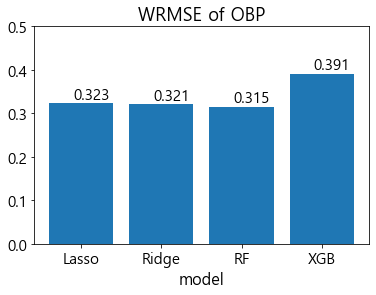

In [72]:
#테스트 데이터셋(2018년)의 선수들의 OBP를 예측
Lasso_OBP = OBP_linear_models['Lasso'].predict(OBP_test.iloc[:, -5:])
Ridge_OBP = OBP_linear_models['Ridge'].predict(OBP_test.iloc[:, -5:])
RF_OBP = OBP_RF_models['RF'].predict(OBP_test.iloc[:, -5:])
XGB_OBP = XGB_OBP_gridsearch.predict(OBP_test.iloc[:, -5:])

#test 데이터의 WRMSE계산
wrmse_score = [wrmse(OBP_test['OBP'], OBP_test['AB'], Lasso_OBP),
              wrmse(OBP_test['OBP'], OBP_test['AB'], Ridge_OBP),
              wrmse(OBP_test['OBP'], OBP_test['AB'], RF_OBP),
              wrmse(OBP_test['OBP'], OBP_test['AB'], XGB_OBP)]

x_lab = ['Lasso', 'Ridge', 'RF', 'XGB']

plt.bar(x_lab, wrmse_score)
plt.title('WRMSE of OBP', fontsize = 18)
plt.xlabel('model', fontsize = 16)
plt.ylabel('', fontsize = 16)
plt.ylim(0, 0.5)

#막대그래프ㅡ 위에 값을 표시
for i, v in enumerate(wrmse_score):
    plt.text(i -0.1, v +0.01, str(np.round(v, 3))) #plt.text(x좌표, y좌표, 텍스트)
    
plt.show()

### SLG기준

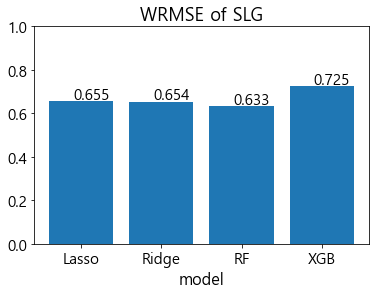

In [74]:
#테스트 데이터셋(2018년)의 선수들의 OBP를 예측
Lasso_SLG = SLG_linear_models['Lasso'].predict(SLG_test.iloc[:, -5:])
Ridge_SLG = SLG_linear_models['Ridge'].predict(SLG_test.iloc[:, -5:])
RF_SLG = SLG_RF_models['RF'].predict(SLG_test.iloc[:, -5:])
XGB_SLG = XGB_SLG_gridsearch.predict(SLG_test.iloc[:, -5:])

#test 데이터의 WRMSE계산
wrmse_score_SLG = [wrmse(SLG_test['SLG'], SLG_test['AB'], Lasso_SLG),
              wrmse(SLG_test['SLG'], SLG_test['AB'], Ridge_SLG),
              wrmse(SLG_test['SLG'], SLG_test['AB'], RF_SLG),
              wrmse(SLG_test['SLG'], SLG_test['AB'], XGB_SLG)]

x_lab = ['Lasso', 'Ridge', 'RF', 'XGB']

plt.bar(x_lab, wrmse_score_SLG)
plt.title('WRMSE of SLG', fontsize = 18)
plt.xlabel('model', fontsize = 16)
plt.ylabel('', fontsize = 16)
plt.ylim(0, 1.0)

#막대그래프ㅡ 위에 값을 표시
for i, v in enumerate(wrmse_score_SLG):
    plt.text(i -0.1, v +0.01, str(np.round(v, 3))) #plt.text(x좌표, y좌표, 텍스트)
    
plt.show()